# Moneyball Update

The Hakes and Sauer paper covered the period from just before the publication of Moneyball to the year it was published. That's more than a decade and half ago now. Let's take look over a longer time period - not just taking advantage of the years that have elapsed since Moneyball was published, but also going back a few years earlier than Hakes and Sauer.

Here we'll do two things:  

>1. Extend the analysis from Hakes and Sauer Table 3 to cover the years 1994 to 2015. We'll then compare three eras (i) Pre-Moneyball (1994-1999) (ii) The Moneyball Era (2000-2007) and (iii) Post-Moneyball (2008-2015). We'll see how salary compensation for OBP and SLG has changed over time.  
>
>2. Both SLG and OBP are composites made up up different statistics. OBP in particular combines the ability to draw walks (BB) with hitting ability. The Moneyball story was mainly told in terms of the ablity to draw walks, so we look at this and other individual hitting statistics independently, to see if we can get a clearer picture of the influence of Moneyball.

## Extending the data period

Hakes and Sauer included all players in their analysis, but we're going to focus on free agents only. Free agents are the only players fully capable of negotiating a salary purely on their skill levels, and so restricting our analysis to free agents should provide a clearer picture of the role of factors such as OBP and SLG.

### Allowing for the effect of experience

In Hakes and Sauer the authors used bargaining status (rookie, arbitration eligible or free agent) as a measure of experience – salary tends to rise with experience. Now that we’re looking at free agents <strong>only</strong> that won’t work. 

But, we had created an experience variable – the number of years since debut. Research has long shown that in any job (not just in sports) that while pay tends to increase with experience, this effect tends to slow down over time, and as people get near the end of their career, pay can even start to fall. 

To capture this we create experience squared as an additional variable. When we add this to the regression along with experience, we can obtain a quadratic effect. This will depend on the coefficients of experience, call them β(E) and β(E)<sup>2</sup>.

Based on our regression model, there are three possible outcomes, which depend on the value of β(E)<sup>2</sup>. Generally, research on earnings tends to support the picture expressed in the first graph - earnings tend to rise with age at first, but as workers age their earnings growth tends to flatten out, and even start to decline at the end of a career. We will see what our data says.

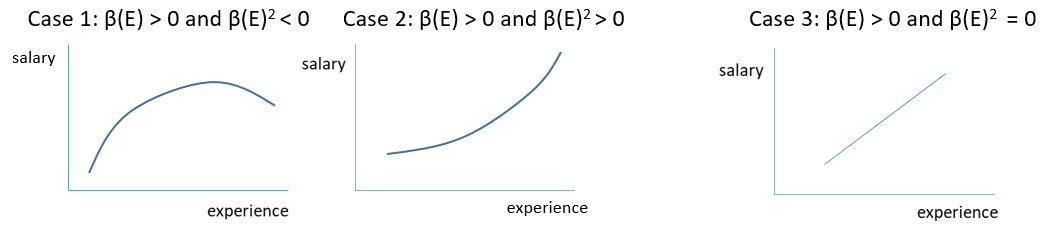

In [1]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
Master =pd.read_csv('../Data/Master.csv')

In [3]:
# we can see here the names of all the variables in our df
print(Master.columns.tolist())

['Unnamed: 0', 'playerID', 'yearID', 'stint', 'G', 'AB', 'R', 'H', 'Doubles', 'Triples', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'PA', 'OBP', 'SLG', 'SalYear', 'teamID', 'lgID', 'salary', 'lnSal', 'debutyr', 'Exp', 'Arb', 'Free', 'POS', 'Catch', 'Infld']


Create the variable 'experience squared'

In [4]:
Master['Exp2']= Master['Exp']**2

We start by running a salary regression for a single season (1994) using only data for free agents.

In [5]:
MB_Seas = Master[(Master.SalYear == 1994) & (Master.Free == 1)]

Here is the regression in long form:

In [6]:
lm1994 = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Exp + Exp2 + C(POS)', data=MB_Seas).fit()
lm1994.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnSal   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     8.679
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           9.28e-11
Time:                        20:38:04   Log-Likelihood:                -121.20
No. Observations:                 117   AIC:                             266.4
Df Residuals:                     105   BIC:                             299.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.2207      1.060     11.525      0.000      10.118      14.323
C(POS)[T.2B]    -0.2229      0.316     -0.706      0.482      -0.849       0.404
C(POS)[T.3B]    -0.1848      0.307     -0.601      0.549      -0.794       0.425
C(POS)[T.C]     -0.0978      0.302     -0.323      0.747      -0.697       0.502
C(POS)[T.DH]    -0.0968      0.354     -0.273      0.785      -0.798       0.605
C(POS)[T.OF]     0.1337      0.237      0.564      0.574      -0.336       0.604
C(POS)[T.SS]     0.2353      0.305      0.772      0.442      -0.369       0.840
OBP             -1.9714      2.192     -0.899      0.370      -6.317       2.375
SLG              3.5236      1.320      2.670      0.009       0.907       6.140
PA               0.0033      0.001      6.463      0.000       0.002       0.004
Exp             -0.0726      0.158     -0.460      0.647      -0.386       0.240
Exp2             0.0040      0.007      0.580      0.563      -0.010       0.018
==============================================================================
Omnibus:                        3.363   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.775
Skew:                          -0.342   Prob(JB):                        0.250
Kurtosis:                       3.318   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And here we can produce the regression coefficients in a column:

In [7]:
from statsmodels.iolib.summary2 import summary_col

lm1994_Out = summary_col(lm1994)

print(lm1994_Out)                        


              lnSal  
---------------------
Intercept    12.2207 
             (1.0604)
C(POS)[T.2B] -0.2229 
             (0.3159)
C(POS)[T.3B] -0.1848 
             (0.3073)
C(POS)[T.C]  -0.0978 
             (0.3024)
C(POS)[T.DH] -0.0968 
             (0.3539)
C(POS)[T.OF] 0.1337  
             (0.2371)
C(POS)[T.SS] 0.2353  
             (0.3049)
OBP          -1.9714 
             (2.1919)
SLG          3.5236  
             (1.3196)
PA           0.0033  
             (0.0005)
Exp          -0.0726 
             (0.1579)
Exp2         0.0040  
             (0.0069)
Standard errors in
parentheses.


We can also add to the column the number of observations in our regression and the R-squared of the regression equation by defining an info_dict.

In [8]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

lm1994_Out = summary_col(lm1994,info_dict = info_dict)

print(lm1994_Out)   


                  lnSal  
-------------------------
Intercept        12.2207 
                 (1.0604)
C(POS)[T.2B]     -0.2229 
                 (0.3159)
C(POS)[T.3B]     -0.1848 
                 (0.3073)
C(POS)[T.C]      -0.0978 
                 (0.3024)
C(POS)[T.DH]     -0.0968 
                 (0.3539)
C(POS)[T.OF]     0.1337  
                 (0.2371)
C(POS)[T.SS]     0.2353  
                 (0.3049)
OBP              -1.9714 
                 (2.1919)
SLG              3.5236  
                 (1.3196)
PA               0.0033  
                 (0.0005)
Exp              -0.0726 
                 (0.1579)
Exp2             0.0040  
                 (0.0069)
R-squared        0.48    
No. observations 117     
Standard errors in
parentheses.


## Writing A Function To Produce The Regressions For Each Year and Combine Them in a Table

This proceeds in several steps:

1. Write a general function for the regression.
2. Create a list where the regression results can be stored.
3. Run the regressions and store them.
4. Associate each regression in the list with its season.

In [9]:
# 1. Write a function to run the Moneyball regression annually for free agents only
def MBExpandFA(Season):
    MB_Seas = Master[(Master.SalYear == Season) & (Master.Free == 1)]
    global lm
    lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Exp + Exp2 + C(POS)', data=MB_Seas).fit()
    return;

In [10]:
# 2. Create list to store regression results
index = 0
lm_Results = [0]
for index in range(1,23):
    lm_Results.append(index)
    index = index + 1
display(lm_Results)    

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

In [11]:
# 3. Run regression and store results
Season = 1994
i = 0
while Season <= 2015:
    MBExpandFA(Season)
    lm_Results[i] = lm
    i = i + 1
    Season = Season + 1

In [12]:
# 4. Give each regression result a name, which is the season to which it corresponds
Season = 1994
lm_Season = ["1994"]
for Season in range(1995, 2016):
    lm_Season.append(str(Season))
    Season = Season + 1

## Divide The Results into Different Eras

The Pre-Moneyball Era: 1994-2000
The Moneyball Era: 2001-2007
The Post-Moneyball Era: 2008-2015

In [13]:
#Create a list of season names to label regression results and divide list into eras
    
Pre_MB = lm_Season[:7]
MB_Period = lm_Season[7:14]
Post_MB = lm_Season[14:]

print(Pre_MB)
print(MB_Period)
print(Post_MB)

['1994', '1995', '1996', '1997', '1998', '1999', '2000']
['2001', '2002', '2003', '2004', '2005', '2006', '2007']
['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


## Tables

We can now generate tables for each of the eras we have defined. The main focus here is on changes in the coefficients on SLG and OBP over time.

**1994-2000**: SLG is statistically significant in every year, OBP is statistically significant in only one year.
**2001-2007**: SLG is statistically significant in five out seven years, OBP is *negative* and signficant in 2001. The only season in which SLG has positive, statistically significant effect is 2004, when the effect is very large. 
**2008-2015**: Neither SLG not OBP are statistically significant in most years, but the size of the OBP coefficient is almost always larger.

This suggests that something changed after the publication of Moneyball, but the picture is complicated. Notably 2004 appears to be a freak year in terms of the valuation of OBP. It could be interpreted to mean that immediately following the publication of Moneyball teams were fixated on hiring players with high OBP stats, but that this fad did not last. 

In [14]:
# Regression results from 1994-2000
from statsmodels.iolib.summary2 import summary_col
PreMB_Out = summary_col([lm_Results[0],lm_Results[1],lm_Results[2],lm_Results[3],lm_Results[4],
                        lm_Results[5],lm_Results[6]], model_names=Pre_MB, 
                        regressor_order=['OBP','SLG'],stars=True, info_dict = info_dict)
print(PreMB_Out)


                    1994       1995      1996       1997       1998      1999      2000   
------------------------------------------------------------------------------------------
OBP              -1.9714    2.0825    -0.7434    2.3981     3.8964**  2.0435    0.5243    
                 (2.1919)   (2.1372)  (2.4763)   (1.9119)   (1.8415)  (1.8559)  (1.8523)  
SLG              3.5236***  3.2243*** 4.5791***  2.7524***  2.5084**  2.2050**  3.3004*** 
                 (1.3196)   (1.1032)  (1.3298)   (0.9679)   (1.0529)  (0.8549)  (0.8675)  
C(POS)[T.2B]     -0.2229    -0.8238** -0.1556    -0.4390*   -0.0762   -0.2234   -0.2995   
                 (0.3159)   (0.3744)  (0.3458)   (0.2625)   (0.2830)  (0.2288)  (0.2144)  
C(POS)[T.3B]     -0.1848    -0.2869   -0.3836    -0.5183*   -0.0632   0.2531    -0.1184   
                 (0.3073)   (0.3039)  (0.3133)   (0.2686)   (0.2478)  (0.2169)  (0.2200)  
C(POS)[T.C]      -0.0978    -0.0599   0.0477     -0.2972    0.1205    -0.0557   -0.1064  

In [15]:
# Regression results from 2001-2007
MB_Out = summary_col([lm_Results[7],lm_Results[8],lm_Results[9],lm_Results[10],lm_Results[11],
                        lm_Results[12],lm_Results[13]], model_names=MB_Period, 
                        regressor_order=['OBP','SLG'],stars=True,info_dict = info_dict)
print(MB_Out)


                    2001       2002       2003      2004      2005       2006       2007   
-------------------------------------------------------------------------------------------
OBP              -4.4873**  1.2123     2.7314    8.6376*** 3.5253     3.8816     3.5105    
                 (1.9492)   (2.5941)   (2.6105)  (2.5749)  (2.1559)   (2.3685)   (2.1785)  
SLG              4.9697***  2.5027**   1.2398    0.9119    3.0474**   2.6973**   2.6916*** 
                 (0.9215)   (1.1996)   (1.3063)  (1.2267)  (1.1791)   (1.1686)   (1.0110)  
C(POS)[T.2B]     0.1754     -0.0614    -0.3085   -0.1345   -0.4302*   -0.1045    -0.2874   
                 (0.2162)   (0.2764)   (0.2887)  (0.2985)  (0.2541)   (0.2469)   (0.2263)  
C(POS)[T.3B]     0.2293     0.1883     0.0015    -0.0130   -0.0926    0.3918*    0.1859    
                 (0.2158)   (0.3019)   (0.2818)  (0.3046)  (0.2735)   (0.2358)   (0.2320)  
C(POS)[T.C]      0.2544     0.3074     0.4770*   0.0617    -0.0666    0.2692   

In [16]:
# Regression results from 2008-2015
PostMB_Out = summary_col([lm_Results[14],lm_Results[15],lm_Results[16],lm_Results[17],lm_Results[18],
                        lm_Results[19],lm_Results[20],lm_Results[21]], model_names=Post_MB, 
                        regressor_order=['OBP','SLG'],stars=True,info_dict = info_dict)
print(PostMB_Out)


                    2008       2009       2010      2011      2012       2013       2014       2015   
------------------------------------------------------------------------------------------------------
OBP              0.3269     6.1876**   7.5898*** 4.3303    -0.4060    2.2000     5.1748*    6.4302*** 
                 (2.4781)   (2.5266)   (2.6414)  (2.8927)  (2.9176)   (2.4281)   (2.8423)   (2.4212)  
SLG              2.2806*    1.8408     2.3051    3.0509**  2.3230     2.2490*    2.5494*    0.3973    
                 (1.2279)   (1.3751)   (1.4887)  (1.4407)  (1.5387)   (1.3485)   (1.3414)   (1.4192)  
C(POS)[T.2B]     -0.0496    -0.0994    -0.0587   0.1564    -0.0113    -0.6429**  0.3347     -0.3732   
                 (0.2609)   (0.3444)   (0.3272)  (0.3055)  (0.3145)   (0.2710)   (0.2554)   (0.2382)  
C(POS)[T.3B]     0.5897**   0.3205     0.4290    -0.1209   0.3340     -0.2797    0.1682     -0.2184   
                 (0.2394)   (0.2544)   (0.2969)  (0.2917)  (0.3019)   (0

## Self Test

You will notice that apart from OBP and SLG, the variables are statistically insignificant almost all of the time. Try rerunning this exercise but including only OBP and SLG as regressors. How do (a) the size of the coefficients on OBP and SLG and (b) the value of R-squared change?

## Pooling the Data

Our final consideration of OBP and SLG involves looking at the regression results when we combine all the seasons into one regression. To see how things changed after the publication of Moneyball we create a dummy variable 'PostMB' equal to zero before 2004 and one after 2004. 

We then regress salary on the same variables as before, but we add these same variables again, but mutliplied by 'PostMB'.  If nothing changed, then the coefficients will be insignificantly different from zero. If something did, this will show up in the coefficients.

In [17]:
# Create a df made up only of free agents and create a dummy variable 'PostMB'
Master_Free = Master[Master.Free == 1].copy()
Master_Free['PostMB'] = np.where(Master_Free['SalYear']>=2004,1,0)
Master_Free.describe()

,Unnamed: 0,yearID,stint,G,AB,R,H,Doubles,Triples,HR,...,salary,lnSal,debutyr,Exp,Arb,Free,Catch,Infld,Exp2,PostMB
count,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,...,3.074000e+03,3074.000000,3074.000000,3074.000000,3074.0,3074.0,3074.000000,3074.000000,3074.000000,3074.000000
mean,3953.208198,2003.820429,1.237476,119.492843,408.668835,58.910865,112.473650,22.198113,1.958035,14.357840,...,5.671662e+06,15.021496,1993.773910,10.046519,0.0,1.0,0.137280,0.319779,108.748536,0.557905
std,2262.645691,6.375108,0.715830,30.618084,144.875872,28.328495,45.496574,10.244876,2.180557,11.287971,...,5.434407e+06,1.131332,7.016133,2.796164,0.0,0.0,0.344199,0.466467,65.879582,0.496716
min,8.000000,1993.000000,1.000000,34.000000,130.000000,6.000000,21.000000,1.000000,0.000000,0.000000,...,1.090000e+05,11.599103,1973.000000,7.000000,0.0,1.0,0.000000,0.000000,49.000000,0.000000
25%,2002.250000,1998.000000,1.000000,98.000000,284.000000,35.000000,74.000000,14.000000,0.000000,6.000000,...,1.400000e+06,14.151983,1988.000000,8.000000,0.0,1.0,0.000000,0.000000,64.000000,0.000000
50%,3960.500000,2004.000000,1.000000,125.000000,427.500000,57.000000,115.000000,21.000000,1.000000,12.000000,...,4.000000e+06,15.201805,1993.000000,9.000000,0.0,1.0,0.000000,0.000000,81.000000,1.000000
75%,5901.750000,2009.000000,1.000000,146.000000,534.750000,80.000000,149.750000,30.000000,3.000000,21.000000,...,8.000000e+06,15.894952,1999.000000,12.000000,0.0,1.0,0.000000,1.000000,144.000000,1.000000
max,7781.000000,2015.000000,10.000000,163.000000,716.000000,152.000000,227.000000,57.000000,21.000000,73.000000,...,3.300000e+07,17.312018,2008.000000,24.000000,0.0,1.0,1.000000,1.000000,576.000000,1.000000


In [18]:
# Pooled Regression Results
Pooled_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Exp + Exp2 + C(POS) + PostMB*(OBP + SLG + PA + Exp + Exp2 + C(POS))',\
                    data=Master_Free).fit()
Pooled_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnSal   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:38:07   Log-Likelihood:                -3633.8
No. Observations:                3074   AIC:                             7316.
Df Residuals:                    3050   BIC:                             7460.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.6683      0.338     31.598      0.000      10.006      11.330
C(POS)[T.2B]           -0.2234      0.094     -2.384      0.017      -0.407      -0.040
C(POS)[T.3B]           -0.1090      0.089     -1.218      0.223      -0.284       0.066
C(POS)[T.C]             0.0516      0.090      0.574      0.566      -0.124       0.228
C(POS)[T.DH]           -0.1424      0.109     -1.303      0.193      -0.357       0.072
C(POS)[T.OF]           -0.0326      0.071     -0.457      0.647      -0.172       0.107
C(POS)[T.SS]            0.0987      0.097      1.020      0.308      -0.091       0.288
OBP                     0.2813      0.703      0.400      0.689      -1.098       1.660
SLG                     3.3345      0.356      9.379      0.000       2.637       4.032
PA                      0.0035      0.000     23.155      0.000       0.003       0.004
Exp                     0.1584      0.049      3.228      0.001       0.062       0.255
Exp2                   -0.0071      0.002     -3.357      0.001      -0.011      -0.003
PostMB                  0.7131      0.447      1.594      0.111      -0.164       1.590
PostMB:C(POS)[T.2B]     0.0584      0.123      0.473      0.636      -0.184       0.300
PostMB:C(POS)[T.3B]     0.2403      0.118      2.029      0.043       0.008       0.472
PostMB:C(POS)[T.C]     -0.0207      0.118     -0.176      0.861      -0.252       0.211
PostMB:C(POS)[T.DH]     0.2058      0.145      1.417      0.156      -0.079       0.490
PostMB:C(POS)[T.OF]     0.1284      0.095      1.355      0.176      -0.057       0.314
PostMB:C(POS)[T.SS]    -0.0843      0.128     -0.661      0.509      -0.335       0.166
PostMB:OBP              2.5731      1.001      2.572      0.010       0.611       4.535
PostMB:SLG             -1.5207      0.514     -2.957      0.003      -2.529      -0.512
PostMB:PA             -2.8e-05      0.000     -0.140      0.889      -0.000       0.000
PostMB:Exp             -0.0519      0.063     -0.819      0.413      -0.176       0.072
PostMB:Exp2             0.0023      0.003      0.842      0.400      -0.003       0.008
==============================================================================
Omnibus:                       14.919   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.956
Skew:                           0.034   Prob(JB):                     4.64e-05
Kurtosis:                       3.389   Cond. No.                     5.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+04. This might indicate that there are
strong multicollinearity or other numerical proble

The key result to note is that coefficient on PostMBxOBP is <strong>positive</strong> and significant while the coefficient on PostMBxSLG is <strong>negative</strong> and significant. This implies that OBP became relatively more important in salary negotiations of free agents after the publication of Moneyball.

## Self Test

Run the regression without the interaction effects. How do the results differ?

# Beyond OBP and SLG


One thing that seems puzzling about all this is the focus on OBP and SLG. Two points to consider:

(i) OBP and SLG include many of the same events – the value of base hits is in OBP, and SLG includes singles, doubles, triples and home runs, which are all counted as hits
(ii) we have data on walks – so why not just look to see if the valuation of walks increased?

Here we try a different approach by looking at walks, singles, doubles, triples and home runs, each per plate appearance, as separate statistics rather than being wrapped up in OBP and SLG (although we will combine doubles and triples as a single measure). 

In [19]:
# We first calculate these rate metrics:
Master['BBPCT'] = Master['BB']/Master['PA']
Master['SinglePCT'] = (Master['H'] - (Master['Doubles'] + Master['Triples'] + Master['HR']))/Master['PA']
Master['XBHPCT'] = (Master['Doubles'] + Master['Triples'])/Master['PA']
Master['HRPCT'] = Master['HR']/Master['PA']
display(Master)

,Unnamed: 0,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,...,Arb,Free,POS,Catch,Infld,Exp2,BBPCT,SinglePCT,XBHPCT,HRPCT
0,0,abbotje01,1998,1,89,244,33,68,14,1,...,0,0,OF,0,0,1,0.034615,0.157692,0.057692,0.046154
1,1,abbotje01,2000,1,80,215,31,59,15,1,...,1,0,OF,0,0,9,0.087137,0.165975,0.066390,0.012448
2,2,abbotku01,1994,1,101,345,41,86,17,3,...,0,0,SS,0,1,1,0.043127,0.153639,0.053908,0.024259
3,3,abbotku01,1995,1,120,420,60,107,18,7,...,0,0,SS,0,1,4,0.076923,0.138889,0.053419,0.036325
4,4,abbotku01,1996,1,109,320,37,81,18,7,...,1,0,SS,0,1,9,0.063037,0.137536,0.071633,0.022923
5,5,abbotku01,1997,1,94,252,35,69,18,2,...,1,0,2B,0,1,16,0.051282,0.157509,0.073260,0.021978
6,6,abbotku01,1998,3,77,194,26,51,13,1,...,1,0,SS,0,1,25,0.056604,0.150943,0.066038,0.023585
7,7,abbotku01,1999,1,96,286,41,78,17,2,...,1,0,2B,0,1,36,0.052459,0.167213,0.062295,0.026230
8,8,abbotku01,2000,1,79,157,22,34,7,1,...,0,1,SS,0,1,49,0.080925,0.115607,0.046243,0.034682
9,9,abernbr01,2001,1,79,304,43,82,17,1,...,0,0,2B,0,1,0,0.080597,0.176119,0.053731,0.014925


## Comparing the Correlations

In [20]:
# Calculate correlation between rate metrics OBP and SLG.
np.corrcoef(Master.OBP, Master.SLG)

array([[1.        , 0.66956761],
       [0.66956761, 1.        ]])

Correlation must lie between – 1 and +1 (zero implies no correlation). The correlation between OBP and SLG is 0.66, which is quite high. When two explanatory (right-hand-side) variables are highly correlated, it means that in a regression, they are doing the same job, and comparing the effect of each may be unreliable. 

In [21]:
# Calculate correlation between
Master[['BBPCT','SinglePCT','XBHPCT','HRPCT']].corr()

,BBPCT,SinglePCT,XBHPCT,HRPCT
BBPCT,1.000000,-0.358295,-0.075188,0.305411
SinglePCT,-0.358295,1.000000,-0.064163,-0.484879
XBHPCT,-0.075188,-0.064163,1.000000,0.078698
HRPCT,0.305411,-0.484879,0.078698,1.000000


Here, we see that the correlation of the simpler stats in generally quite low and sometimes even negative. This means that when we run the regressions the impact of each variable is less likely to get confused with the effect of another variable.

## Self Test

Generate the correlation matrix to include OBP, SLG and the simple stats above. If you had to choose one variable to stand in as a proxy for OBP and one variable to stand in as a proxy for SLG, which ones would you choose, based on the correlation matrix? Explain why you made the decision you did. 

## Running Regressions for Each Season

Once again we write a function to produce our regression results for the three eras we defined before. 

In [22]:
# Write a function to run the updated Moneyball regression using rate metrics annually for free agents only.
def MBRateFA(Season):
    MB_Seas = Master[(Master.SalYear == Season) & (Master.Free == 1)]
    global lmrate
    lmrate = smf.ols(formula = 'lnSal ~ BBPCT + SinglePCT + XBHPCT + HRPCT + PA + Exp + Exp2 + C(POS)', data=MB_Seas).fit()
    return;

In [23]:
# Create list to store regression results.
index = 0
lmrate_Results = [0]
for index in range(1,23):
    lmrate_Results.append(index)
    index = index + 1
display(lmrate_Results)    

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

In [24]:
# Run rate regression and store results.
Season = 1994
i = 0
while Season <= 2015:
    MBRateFA(Season)
    lmrate_Results[i] = lmrate
    i = i + 1
    Season = Season + 1

## Results

Now compare the three tables again. This time a very striking pattern emerges. 

## Self Test

Review the regression tables and describe the pattern of changes you see in the coefficients for walks, singles, doubles and triples and home runs, over time.

In [25]:
# Rate regression results from 1994-2000.
PreMBRate_Out = summary_col([lmrate_Results[0],lmrate_Results[1],lmrate_Results[2],lmrate_Results[3],lmrate_Results[4],
                        lmrate_Results[5],lmrate_Results[6]], model_names=Pre_MB, 
                        regressor_order=['BBPCT','SinglePCT','XBHPCT','HRPCT'],stars=True,info_dict = info_dict)
print(PreMBRate_Out)


                    1994       1995       1996       1997       1998       1999       2000   
---------------------------------------------------------------------------------------------
BBPCT            0.1272     4.8111**   1.9364     3.3716*    6.5025***  4.0172**   2.3896    
                 (2.0872)   (2.0586)   (2.3243)   (1.8456)   (1.7406)   (1.7147)   (1.7491)  
SinglePCT        3.0070     6.4943**   1.8216     6.8559**   5.0226*    4.3712*    3.5076    
                 (2.8115)   (2.9028)   (3.3869)   (2.7427)   (2.6628)   (2.3057)   (2.3114)  
XBHPCT           3.0375     2.9927     6.0968     1.2435     9.0066**   2.0389     5.0646    
                 (6.0924)   (4.8475)   (6.8783)   (5.0401)   (4.3240)   (4.0938)   (4.0143)  
HRPCT            16.2166*** 21.3554*** 18.6132*** 17.8298*** 15.2947*** 13.9078*** 16.9330***
                 (5.7884)   (5.0633)   (5.6054)   (4.4955)   (4.4413)   (3.6425)   (3.6060)  
C(POS)[T.2B]     -0.1547    -0.6364*   -0.1242    -0.3593  

In [26]:
# Rate regression results from 2001-2007.
MBRate_Out = summary_col([lmrate_Results[7],lmrate_Results[8],lmrate_Results[9],lmrate_Results[10],lmrate_Results[11],
                        lmrate_Results[12],lmrate_Results[13]], model_names=MB_Period, 
                        regressor_order=['BBPCT','SinglePCT','XBHPCT','HRPCT'],stars=True,info_dict = info_dict)
print(MBRate_Out)


                    2001       2002       2003       2004       2005       2006       2007   
---------------------------------------------------------------------------------------------
BBPCT            -2.2953    3.0026     3.5093     10.3565*** 5.6528***  5.1918**   5.6404*** 
                 (1.7353)   (2.1886)   (2.2712)   (2.3863)   (1.8306)   (2.2594)   (1.9912)  
SinglePCT        1.7651     2.3059     3.4494     3.8633     8.4434***  7.6314**   4.5294*   
                 (2.6056)   (3.0995)   (2.9041)   (3.1953)   (2.6042)   (2.9898)   (2.3252)  
XBHPCT           2.9895     7.8397     -2.1620    0.3953     -0.9538    9.1302*    3.6763    
                 (4.4527)   (6.2746)   (5.3307)   (5.2045)   (5.0861)   (5.3944)   (4.2646)  
HRPCT            19.5477*** 13.2223*** 10.5339**  11.8740**  23.4999*** 16.9661*** 16.0035***
                 (3.6251)   (4.6431)   (5.0029)   (5.0528)   (4.8981)   (4.9410)   (3.8826)  
C(POS)[T.2B]     0.1691     0.0566     -0.2651    0.1104   

In [27]:
# Regression results from 2008-2015.
PostMBRate_Out = summary_col([lmrate_Results[14],lmrate_Results[15],lmrate_Results[16],lmrate_Results[17],lmrate_Results[18],
                        lmrate_Results[19],lmrate_Results[20],lmrate_Results[21]], model_names=Post_MB, 
                        regressor_order=['BBPCT','SinglePCT','XBHPCT','HRPCT'],stars=True, info_dict = info_dict)
print(PostMBRate_Out)


                    2008       2009       2010       2011      2012       2013       2014       2015   
-------------------------------------------------------------------------------------------------------
BBPCT            4.2208*    6.4273***  9.2144***  6.9870**  3.4977     4.8993*    7.4866***  8.0403*** 
                 (2.3108)   (2.2845)   (2.5031)   (2.8468)  (2.7092)   (2.6614)   (2.7167)   (2.2948)  
SinglePCT        -0.4597    8.3513***  10.0502*** 6.2895*   -3.2406    2.9205     3.6209     4.5738*   
                 (2.4234)   (3.0105)   (3.0804)   (3.2555)  (3.3373)   (2.6839)   (2.7092)   (2.3833)  
XBHPCT           2.3999     9.9887*    2.6416     14.1943** 9.4795     5.0510     19.1557*** 11.4086** 
                 (4.9770)   (5.9081)   (6.7088)   (5.9687)  (6.1713)   (5.0668)   (5.3947)   (4.8060)  
HRPCT            10.1205**  14.7913**  22.7682*** 14.0384** 6.2010     12.8449**  11.9636**  6.2449    
                 (4.4730)   (5.8359)   (6.5576)   (6.5887)  (6.

First, note that the value of SinglePCT (singles) and XBHPCT (doubles and triples) are not statistically significant in most years. The value placed by the teams on free agents tends to depend on home runs and walks most of the time. Home runs are statistically significant in every season apart from 2012 and 2015. The valuation of walks appears to have changed over time. Before the publication of Moneyball the coefficient is statistically significant only three times (out of ten). Since the publication of Moneyball, however, walks have been statistically significant nine times out of twelve. On average, the size of the coefficient is much larger since Moneyball. This seems like a striking confirmation that Moneyball changed the teams' perceptions of the value of a walk.

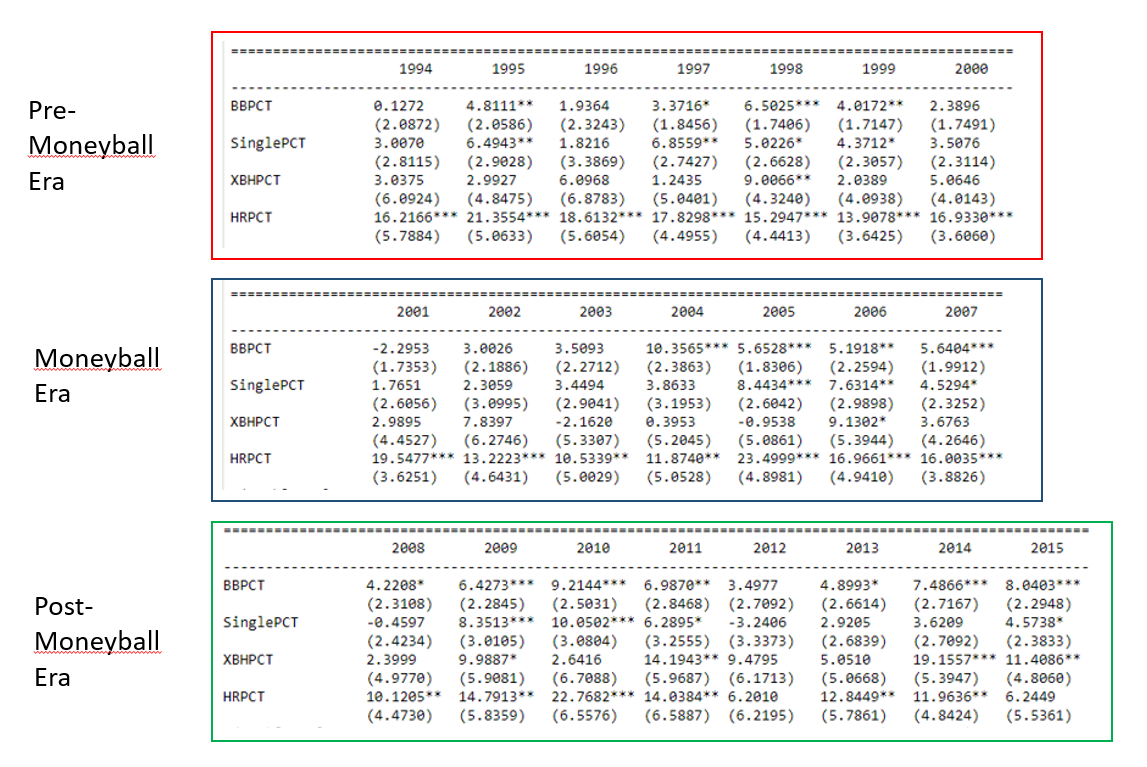

## Pooling the Data

Once again we pool the data and run a regression where we allow for an interaction of the post-Moneyball dummy variable ('PostMB') with all of the explanatory variables.

In [28]:
Master['PostMB'] = np.where(Master['SalYear'] >= 2004, 1, 0)

In [29]:
# Pooled Rate Regression Results.
Master_Free = Master[Master.Free == 1]
Pooled_lmrate = smf.ols(formula = 'lnSal ~ BBPCT + SinglePCT + XBHPCT + HRPCT + PA + Exp + Exp2 + C(POS) + PostMB*(BBPCT + SinglePCT + XBHPCT + HRPCT + PA + Exp + Exp2 + C(POS))',data=Master_Free).fit()

Pooled_lmrate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnSal   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     122.3
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:38:10   Log-Likelihood:                -3612.2
No. Observations:                3074   AIC:                             7280.
Df Residuals:                    3046   BIC:                             7449.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.8321      0.350     30.940      0.000      10.146      11.519
C(POS)[T.2B]           -0.1420      0.095     -1.497      0.134      -0.328       0.044
C(POS)[T.3B]           -0.0890      0.089     -1.000      0.317      -0.264       0.086
C(POS)[T.C]             0.0659      0.090      0.735      0.462      -0.110       0.242
C(POS)[T.DH]           -0.1519      0.109     -1.398      0.162      -0.365       0.061
C(POS)[T.OF]           -0.0024      0.071     -0.034      0.973      -0.142       0.137
C(POS)[T.SS]            0.1744      0.098      1.785      0.074      -0.017       0.366
BBPCT                   2.4627      0.647      3.809      0.000       1.195       3.731
SinglePCT               2.9225      0.894      3.270      0.001       1.170       4.675
XBHPCT                  4.3162      1.672      2.581      0.010       1.038       7.595
HRPCT                  16.4291      1.483     11.075      0.000      13.521      19.338
PA                      0.0035      0.000     23.006      0.000       0.003       0.004
Exp                     0.1541      0.049      3.159      0.002       0.058       0.250
Exp2                   -0.0070      0.002     -3.327      0.001      -0.011      -0.003
PostMB                  0.7281      0.459      1.588      0.112      -0.171       1.627
PostMB:C(POS)[T.2B]     0.0664      0.125      0.530      0.596      -0.179       0.312
PostMB:C(POS)[T.3B]     0.2599      0.118      2.201      0.028       0.028       0.491
PostMB:C(POS)[T.C]      0.0096      0.118      0.081      0.935      -0.222       0.241
PostMB:C(POS)[T.DH]     0.1957      0.144      1.356      0.175      -0.087       0.479
PostMB:C(POS)[T.OF]     0.1360      0.095      1.436      0.151      -0.050       0.322
PostMB:C(POS)[T.SS]    -0.0632      0.130     -0.488      0.626      -0.317       0.191
PostMB:BBPCT            2.3730      0.931      2.550      0.011       0.548       4.198
PostMB:SinglePCT        0.8348      1.197      0.697      0.486      -1.513       3.182
PostMB:XBHPCT          -0.8462      2.270     -0.373      0.709      -5.298       3.605
PostMB:HRPCT           -4.4087      2.110     -2.090      0.037      -8.545      -0.272
PostMB:PA            -6.93e-06      0.000     -0.035      0.972      -0.000       0.000
PostMB:Exp             -0.0492      0.063     -0.780      0.435      -0.173       0.074
PostMB:Exp2             0.0021      0.003      0.788      0.431      -0.003       0.007
==============================================================================
Omnibus:                       14.750   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.051
Skew:                           0.007   Prob(JB):                     4.43e-05
Kurtosis:                       3.395  

The conclusion from the interaction terms (PostMB:BBPCT and PostMB:HRPCT) is similar to what we found from looking at the regressions for individual seasons. The size of the coefficient on home runs has fallen significantly, suggesting it valued somewhat less than before the publication of Moneyball, while the coefficient on walks is positive, implying they are valued more highly. Both coefficients are statistically significant at the conventional level (pvalue 0.05 or less).

## Conclusions

We have extended the Moneyball analysis of Hakes and Sauer over a longer period, and the data broadly confirms their findings: there do appear to have been changes in the way that teams value players (free agents) as measured by their salaries, and that these changes appear consistent with placing more value on the capacity of players to draw walks.

As with any statistical analysis, there are caveats. We noted that the increased significance of OBP seemed to rest largely on the 2004 data - could this just have been a freak coincidence? Or just a fad? The evidence using the individual batting statistics seems more persuasive and seems to imply a long term re-evaluation. 

Moneyball isn't the only thing to happen to baseball between 1994 and 2015. Notably, the early part of this period is now known as the steroid era, when players more or less openly used steroids to bulk up, leading to significant increases in the capacity to hit the ball. The <a href="https://en.wikipedia.org/wiki/BALCO_scandal">BALCO trials</a> and the subsequent reaction against the use of steroids, leading to increased monitoring, have no doubt had an impact on the valuation of player skills. How these effects manifested themselves is likely to be complicated, and might possibly interact with effects we may have attributed to Moneyball.

Moreover, there is always a nagging question obout the claim that the capacity to draw walks was undervalued before 2003. How can it be, if this skill is valuable, that GMs, scouts, analysts, sabrmetricians and fans all missed this fact <strong>for over one hundred years?</strong> It seems hard to believe, if the skill is so important, that everyone missed it before 2003. 

All that said, there does seem to be evidence that something changed in the perception of the capacity to draw walks when Moneyball was published. The data suggests that Moneyball was real.

